In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [173]:
csvdata = pd.read_csv("空氣品質監測月值.csv")
csvdata

,序號,縣市,監測月份,測站,二氧化硫<br />SO2<br />(ppb),一氧化碳<br />CO<br />(ppm),二氧化碳<br />CO2<br />(ppm),臭氧<br />O3<br />(ppb),懸浮微粒<br />PM 10 <br />(μg/m 3 ),細懸浮微粒<br />PM 2.5 <br />(μg/m 3 ),...,總碳氫化合物<br />THC<br />(ppm),非甲烷碳氫化合物<br />NMHC<br />(ppm),甲烷<br />CH4<br />(ppm),風速<br />WIND_SPEED<br />(m/sec),小時風速值<br />WS_HR<br />(m/sec),溫度<br />AMB_TEMP<br />(℃),降雨強度<br />RAIN_INT<br />(㎜),酸雨<br />PH_RAIN<br />(pH),相對濕度<br />RH<br />(percent),導電度<br />RAIN_COND<br />(μmho/cm)
0,1,臺北市,Apr-20,松山,2.0,0.42,437.2,38.8,31.0,18.0,...,1.923,0.118,1.806,1.78,1.34,20.21,NaN,NaN,72.95,NaN
1,2,臺北市,Apr-20,古亭,1.3,0.38,NaN,44.9,27.0,15.0,...,2.022,0.112,1.910,1.40,0.89,20.30,NaN,NaN,73.86,NaN
2,3,臺北市,Apr-20,中山,1.7,0.58,NaN,36.5,29.0,17.0,...,2.069,0.161,1.908,1.82,1.44,20.92,NaN,NaN,71.47,NaN
3,4,臺北市,Apr-20,大同,2.2,0.98,NaN,NaN,34.0,20.0,...,2.093,0.277,1.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,臺北市,Apr-20,萬華,1.6,0.46,NaN,36.5,30.0,17.0,...,NaN,NaN,NaN,1.82,1.50,20.91,NaN,NaN,69.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,連江縣,Aug-19,馬祖,2.3,0.14,NaN,36.1,29.0,15.0,...,NaN,NaN,NaN,2.54,2.12,28.58,3.82,6.30,88.84,31.13
997,998,連江縣,Jul-19,馬祖,1.9,0.08,NaN,29.0,27.0,11.0,...,NaN,NaN,NaN,3.62,3.38,27.32,4.83,5.44,93.27,37.84
998,999,連江縣,Jun-19,馬祖,2.1,0.17,NaN,41.4,31.0,14.0,...,NaN,NaN,NaN,2.28,2.01,24.40,2.57,5.47,92.76,78.92
999,1000,連江縣,May-19,馬祖,2.1,0.23,NaN,56.5,46.0,21.0,...,NaN,NaN,NaN,2.04,1.67,20.80,1.84,5.29,84.08,78.64


In [174]:
list1 = []
for i in csvdata.columns:
    list1.append(i)
for i in range(4):
    del list1[0]
print(list1)

['二氧化硫<br />SO2<br />(ppb)', '一氧化碳<br />CO<br />(ppm)', '二氧化碳<br />CO2<br />(ppm)', '臭氧<br />O3<br />(ppb)', '懸浮微粒<br />PM 10 <br />(μg/m 3 )', '細懸浮微粒<br />PM 2.5 <br />(μg/m 3 )', '氮氧化物<br />NOx<br />(ppb)', '一氧化氮<br />NO<br />(ppb)', '二氧化氮<br />NO2<br />(ppb)', '總碳氫化合物<br />THC<br />(ppm)', '非甲烷碳氫化合物<br />NMHC<br />(ppm)', '甲烷<br />CH4<br />(ppm)', '風速<br />WIND_SPEED<br />(m/sec)', '小時風速值<br />WS_HR<br />(m/sec)', '溫度<br />AMB_TEMP<br />(℃)', '降雨強度<br />RAIN_INT<br />(㎜)', '酸雨<br />PH_RAIN<br />(pH)', '相對濕度<br />RH<br />(percent)', '導電度<br />RAIN_COND<br />(μmho/cm)']


In [175]:
list2 = []
for str in list1:
    list2.append(str.split("<br />")[0] + str.split("<br />")[2])
print (list2)

['二氧化硫(ppb)', '一氧化碳(ppm)', '二氧化碳(ppm)', '臭氧(ppb)', '懸浮微粒(μg/m 3 )', '細懸浮微粒(μg/m 3 )', '氮氧化物(ppb)', '一氧化氮(ppb)', '二氧化氮(ppb)', '總碳氫化合物(ppm)', '非甲烷碳氫化合物(ppm)', '甲烷(ppm)', '風速(m/sec)', '小時風速值(m/sec)', '溫度(℃)', '降雨強度(㎜)', '酸雨(pH)', '相對濕度(percent)', '導電度(μmho/cm)']


In [176]:
for na in range(len(list1)):
    csvdata.rename(columns = {list1[na] : list2[na] }, inplace = True)
csvdata

,序號,縣市,監測月份,測站,二氧化硫(ppb),一氧化碳(ppm),二氧化碳(ppm),臭氧(ppb),懸浮微粒(μg/m 3 ),細懸浮微粒(μg/m 3 ),...,總碳氫化合物(ppm),非甲烷碳氫化合物(ppm),甲烷(ppm),風速(m/sec),小時風速值(m/sec),溫度(℃),降雨強度(㎜),酸雨(pH),相對濕度(percent),導電度(μmho/cm)
0,1,臺北市,Apr-20,松山,2.0,0.42,437.2,38.8,31.0,18.0,...,1.923,0.118,1.806,1.78,1.34,20.21,NaN,NaN,72.95,NaN
1,2,臺北市,Apr-20,古亭,1.3,0.38,NaN,44.9,27.0,15.0,...,2.022,0.112,1.910,1.40,0.89,20.30,NaN,NaN,73.86,NaN
2,3,臺北市,Apr-20,中山,1.7,0.58,NaN,36.5,29.0,17.0,...,2.069,0.161,1.908,1.82,1.44,20.92,NaN,NaN,71.47,NaN
3,4,臺北市,Apr-20,大同,2.2,0.98,NaN,NaN,34.0,20.0,...,2.093,0.277,1.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,臺北市,Apr-20,萬華,1.6,0.46,NaN,36.5,30.0,17.0,...,NaN,NaN,NaN,1.82,1.50,20.91,NaN,NaN,69.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,連江縣,Aug-19,馬祖,2.3,0.14,NaN,36.1,29.0,15.0,...,NaN,NaN,NaN,2.54,2.12,28.58,3.82,6.30,88.84,31.13
997,998,連江縣,Jul-19,馬祖,1.9,0.08,NaN,29.0,27.0,11.0,...,NaN,NaN,NaN,3.62,3.38,27.32,4.83,5.44,93.27,37.84
998,999,連江縣,Jun-19,馬祖,2.1,0.17,NaN,41.4,31.0,14.0,...,NaN,NaN,NaN,2.28,2.01,24.40,2.57,5.47,92.76,78.92
999,1000,連江縣,May-19,馬祖,2.1,0.23,NaN,56.5,46.0,21.0,...,NaN,NaN,NaN,2.04,1.67,20.80,1.84,5.29,84.08,78.64


In [177]:
csvdata.describe()

,序號,二氧化硫(ppb),一氧化碳(ppm),二氧化碳(ppm),臭氧(ppb),懸浮微粒(μg/m 3 ),細懸浮微粒(μg/m 3 ),氮氧化物(ppb),一氧化氮(ppb),二氧化氮(ppb),總碳氫化合物(ppm),非甲烷碳氫化合物(ppm),甲烷(ppm),風速(m/sec),小時風速值(m/sec),溫度(℃),降雨強度(㎜),酸雨(pH),相對濕度(percent),導電度(μmho/cm)
count,1001.000000,996.000000,987.000000,76.000000,972.000000,989.000000,998.000000,997.000000,997.000000,997.000000,494.000000,494.000000,494.000000,973.000000,948.000000,986.000000,247.000000,247.000000,985.000000,247.000000
mean,501.000000,2.235944,0.371256,427.358421,32.527366,34.253792,16.957916,15.598465,3.755998,11.840311,2.040632,0.143812,1.897101,2.311799,1.975454,23.965142,2.865304,5.118502,76.280041,60.353158
std,289.108111,0.683777,0.176469,11.934631,8.433178,12.475048,6.368036,11.613715,6.655875,6.054632,0.123961,0.070214,0.098288,1.008627,1.016212,4.143717,3.670451,1.293804,5.213789,75.889116
min,1.000000,0.400000,0.060000,400.750000,14.900000,10.000000,3.000000,1.540000,0.130000,1.030000,1.730000,0.008000,1.636000,0.840000,0.590000,11.290000,0.000000,0.000000,60.610000,0.000000
25%,251.000000,1.800000,0.270000,419.962500,26.100000,24.000000,12.000000,9.610000,1.490000,7.750000,1.955250,0.100000,1.831000,1.690000,1.347500,20.542500,1.355000,4.845000,72.610000,19.615000
50%,501.000000,2.200000,0.340000,426.635000,32.400000,32.000000,16.000000,13.340000,2.140000,11.070000,2.043000,0.135000,1.895000,2.050000,1.700000,24.290000,2.110000,5.230000,75.990000,36.100000
75%,751.000000,2.600000,0.430000,435.185000,37.700000,42.000000,22.000000,18.250000,3.310000,15.030000,2.133000,0.170000,1.972000,2.610000,2.330000,27.675000,3.640000,5.640000,79.710000,64.815000
max,1001.000000,5.300000,1.280000,457.810000,62.000000,83.000000,32.000000,96.870000,62.530000,37.320000,2.336000,0.385000,2.139000,7.970000,7.350000,31.460000,42.990000,8.350000,93.270000,458.180000


In [178]:
city_SO2 = csvdata.groupby(by = "縣市")["二氧化硫(ppb)"].mean()

In [179]:
city_CO = csvdata.groupby(by = "縣市")["一氧化碳(ppm)"].mean()

In [180]:
city_CO2 = csvdata.groupby(by = "縣市")["二氧化碳(ppm)"].mean()

In [181]:
city_O3 = csvdata.groupby(by = "縣市")["臭氧(ppb)"].mean()

In [182]:
city_PM10 = csvdata.groupby(by = "縣市")["懸浮微粒(μg/m 3 )"].mean()

In [183]:
city_PM25 = csvdata.groupby(by = "縣市")["細懸浮微粒(μg/m 3 )"].mean()

In [184]:
city_NOx = csvdata.groupby(by = "縣市")["氮氧化物(ppb)"].mean()

In [185]:
city_NO = csvdata.groupby(by = "縣市")["一氧化氮(ppb)"].mean()

In [186]:
city_NO2 = csvdata.groupby(by = "縣市")["二氧化氮(ppb)"].mean()

In [187]:
city_THC = csvdata.groupby(by = "縣市")["總碳氫化合物(ppm)"].mean()

In [188]:
city_NMHC = csvdata.groupby(by = "縣市")["非甲烷碳氫化合物(ppm)"].mean()

In [189]:
city_CH4 = csvdata.groupby(by = "縣市")["甲烷(ppm)"].mean()

In [190]:
city_WIND_SPEED = csvdata.groupby(by = "縣市")["風速(m/sec)"].mean()

In [191]:
city_WS_HR = csvdata.groupby(by = "縣市")["小時風速值(m/sec)"].mean()

In [192]:
city_AMB_TEMP = csvdata.groupby(by = "縣市")["溫度(℃)"].mean()

In [193]:
city_RAIN_INT = csvdata.groupby(by = "縣市")["降雨強度(㎜)"].mean()

In [194]:
city_PH_RAIN = csvdata.groupby(by = "縣市")["酸雨(pH)"].mean()

In [195]:
city_RH = csvdata.groupby(by = "縣市")["相對濕度(percent)"].mean()

In [196]:
city_RAIN_COND = csvdata.groupby(by = "縣市")["導電度(μmho/cm)"].mean()

In [197]:
dict_cityair = {"縣市":city_SO2.index,"二氧化硫(ppb)":city_SO2.values,"一氧化碳(ppm)":city_CO.values,"二氧化碳(ppm)":city_CO2.values,"臭氧(ppb)":city_O3.values,"懸浮微粒(μg/m 3)":city_PM10.values,"細懸浮微粒(μg/m 3)":city_PM25.values,"氮氧化物(ppb)":city_NOx.values,"一氧化氮(ppb)":city_NO.values,"二氧化氮(ppb)":city_NO2.values,"總碳氫化合物(ppm)":city_THC.values,"非甲烷碳氫化合物(ppm)":city_NMHC.values,"甲烷(ppm)":city_CH4.values,"風速(m/sec)":city_WIND_SPEED.values,"小時風速值(m/sec)":city_WS_HR.values,"溫度(℃)":city_AMB_TEMP.values,"降雨強度(㎜)":city_RAIN_INT.values,"酸雨(pH)":city_PH_RAIN.values,"相對濕度(percent)":city_RH.values,"導電度(μmho/cm)":city_RAIN_COND.values}
df_cityair = pd.DataFrame(dict_cityair)
df_cityair

,縣市,二氧化硫(ppb),一氧化碳(ppm),二氧化碳(ppm),臭氧(ppb),懸浮微粒(μg/m 3),細懸浮微粒(μg/m 3),氮氧化物(ppb),一氧化氮(ppb),二氧化氮(ppb),總碳氫化合物(ppm),非甲烷碳氫化合物(ppm),甲烷(ppm),風速(m/sec),小時風速值(m/sec),溫度(℃),降雨強度(㎜),酸雨(pH),相對濕度(percent),導電度(μmho/cm)
0,南投縣,1.979487,0.346667,NaN,29.510526,36.236842,20.153846,13.396154,2.165897,11.226923,1.939692,0.131846,1.807692,1.416923,1.062564,23.504872,2.583077,4.929231,77.198205,13.597692
1,嘉義市,2.376923,0.374615,NaN,29.884615,41.076923,21.153846,14.188462,1.662308,12.520000,1.970615,0.119923,1.850923,1.911538,1.605385,24.808462,NaN,NaN,73.590000,NaN
2,嘉義縣,2.273077,0.307308,NaN,32.650000,45.730769,20.230769,10.607692,1.859231,8.741538,NaN,NaN,NaN,1.993077,1.676154,24.570000,NaN,NaN,75.606154,NaN
3,基隆市,1.676923,0.320769,NaN,33.153846,28.076923,12.538462,13.101538,3.498462,9.598462,1.909462,0.085846,1.823692,1.253077,0.873077,23.132308,NaN,NaN,81.518462,NaN
4,宜蘭縣,1.784615,0.260385,425.397692,30.703846,24.000000,10.884615,7.648846,1.538846,6.096538,NaN,NaN,NaN,1.539615,1.196154,23.194000,2.017692,5.245385,78.858462,51.504615
5,屏東縣,1.766667,0.284211,413.811667,37.136842,34.837838,17.789474,8.481081,1.238378,7.232703,2.061615,0.100154,1.961615,2.992632,2.702895,25.290526,2.780769,5.230000,77.130000,54.437692
6,彰化縣,2.835897,0.336923,NaN,31.248718,39.333333,18.794872,12.160000,1.724615,10.433077,2.069269,0.124269,1.945308,2.960769,2.701795,24.154615,NaN,NaN,76.935128,NaN
7,新北市,2.023718,0.439808,NaN,32.820280,28.967320,13.705128,21.589423,7.563974,14.032756,2.059523,0.182723,1.876954,2.469231,2.159000,23.513654,2.540000,5.081154,74.528141,105.556538
8,新竹市,2.000000,0.338462,NaN,33.753846,31.076923,14.692308,13.420000,1.771538,11.640769,1.889077,0.102385,1.786615,2.345385,1.775385,24.032308,NaN,NaN,72.206923,NaN
9,新竹縣,1.811538,0.278077,NaN,35.257692,28.346154,14.840000,10.062308,1.762692,8.299615,NaN,NaN,NaN,2.745000,2.392308,22.899615,NaN,NaN,78.091923,NaN


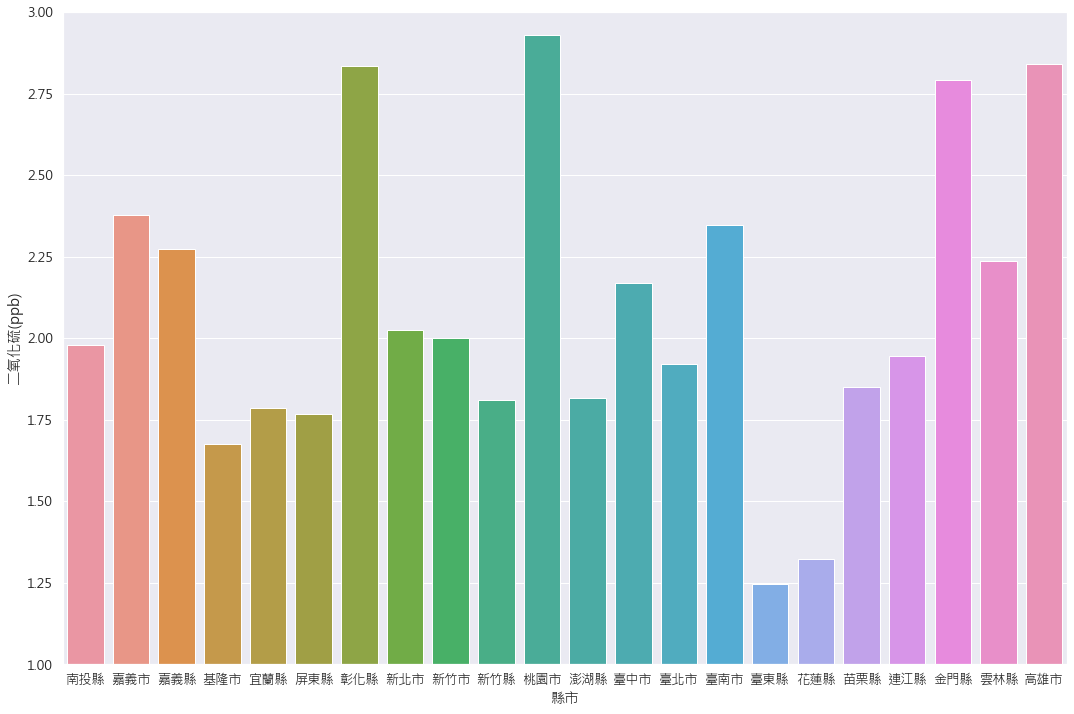

In [198]:
from matplotlib.font_manager import FontProperties

plt.figure(figsize = (18,12))
plt.ylim(1,3)

myfont=FontProperties(fname=r'C:\Users\howar\Desktop\msj.ttf',size=14)
sns.set(style="darkgrid",font_scale=1.2,font=myfont.get_family())
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

sns.barplot(x=df_cityair['縣市'],y=df_cityair['二氧化硫(ppb)'])

In [4]:
csvdata2 = pd.read_csv("File_14318.csv",encoding='big5').rename(columns={'縣市別': '縣市'})
csvdata2

,癌症診斷年,性別,縣市,癌症別,年齡標準化發生率 WHO 2000世界標準人口 (每10萬人口),癌症發生數,平均年齡,年齡中位數,粗率 (每10萬人口)
0,1979,不分性別,台閩地區,口腔、口咽及下咽,3.40,439,53.37,55.0,2.50
1,1979,不分性別,台閩地區,主唾液腺,0.36,49,46.67,47.0,0.28
2,1979,不分性別,台閩地區,鼻咽,7.73,1047,46.82,47.0,5.97
3,1979,不分性別,台閩地區,食道,3.16,377,59.23,59.0,2.15
4,1979,不分性別,台閩地區,胃,12.09,1471,57.39,59.0,8.39
...,...,...,...,...,...,...,...,...,...
87785,2016,女,連江縣,女性乳房,24.88,2,53.00,53.0,36.92
87786,2016,女,連江縣,卵巢、輸卵管及寬韌帶,32.35,2,35.00,35.0,36.92
87787,2016,女,連江縣,甲狀腺,30.47,2,39.50,39.5,36.92
87788,2016,女,連江縣,白血病,12.44,1,54.00,54.0,18.46


In [5]:
cancer1 = csvdata2[(csvdata2["癌症診斷年"] == 2016) & (csvdata2["性別"] == "不分性別") & (csvdata2["癌症別"] == "肺、支氣管及氣管")].drop(85346)
cancer1

,癌症診斷年,性別,縣市,癌症別,年齡標準化發生率 WHO 2000世界標準人口 (每10萬人口),癌症發生數,平均年齡,年齡中位數,粗率 (每10萬人口)
85390,2016,不分性別,台北市,肺、支氣管及氣管,36.11,1713,67.85,68.0,63.55
85435,2016,不分性別,台中市,肺、支氣管及氣管,36.66,1424,65.83,66.0,51.46
85478,2016,不分性別,台南市,肺、支氣管及氣管,36.55,1133,66.56,67.0,60.07
85521,2016,不分性別,高雄市,肺、支氣管及氣管,33.87,1528,66.37,66.0,54.98
85565,2016,不分性別,基隆市,肺、支氣管及氣管,34.39,218,68.49,68.0,58.59
85606,2016,不分性別,新竹市,肺、支氣管及氣管,34.08,205,67.22,67.0,46.87
85647,2016,不分性別,嘉義市,肺、支氣管及氣管,39.75,173,66.60,66.0,64.10
85687,2016,不分性別,新北市,肺、支氣管及氣管,38.47,2299,65.37,65.0,57.78
85731,2016,不分性別,桃園市,肺、支氣管及氣管,35.17,995,65.93,66.0,46.33
85774,2016,不分性別,新竹縣,肺、支氣管及氣管,33.64,261,66.26,67.0,47.67


In [6]:
cancer2 = cancer1[["縣市","癌症發生數"]]
cancer2

,縣市,癌症發生數
85390,台北市,1713
85435,台中市,1424
85478,台南市,1133
85521,高雄市,1528
85565,基隆市,218
85606,新竹市,205
85647,嘉義市,173
85687,新北市,2299
85731,桃園市,995
85774,新竹縣,261


In [7]:
cancer2.replace('台北市', '臺北市', inplace = True)
cancer2.replace('台中市', '臺中市', inplace = True)
cancer2.replace('台南市', '臺南市', inplace = True)
cancer2.replace('台東縣', '臺東縣', inplace = True)
cancer2

C:\Users\k2294\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,縣市,癌症發生數
85390,臺北市,1713
85435,臺中市,1424
85478,臺南市,1133
85521,高雄市,1528
85565,基隆市,218
85606,新竹市,205
85647,嘉義市,173
85687,新北市,2299
85731,桃園市,995
85774,新竹縣,261


In [8]:
population = pd.read_html('https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Taiwan')[0]
population

,ISO,HRCIS,Flag,English name,Chinese name,Type,Population 2020[a],Area (km2),Population density (/km2),Population 2010[b],Population change[c],Subdivision count,Largest subdivision
0,.mw-parser-output .monospaced{font-family:mono...,65000,NaN,New Taipei City,新北市,Special municipality,4023620,2052.57,1960.29,3897367,"+126,253",29,Banqiao District
1,TPE,63000,NaN,Taipei City,臺北市,Special municipality,2635286,271.80,9695.69,2618772,"+16,514",12,Daan District
2,TAO,68000,NaN,Taoyuan City,桃園市,Special municipality,2254363,1220.95,1846.39,2002060,"+252,303",13,Taoyuan District
3,TXG,66000,NaN,Taichung City,臺中市,Special municipality,2816667,2214.90,1271.69,2648419,"+168,248",29,Beitun District
4,TNN,67000,NaN,Tainan City,臺南市,Special municipality,1879115,2191.65,857.40,1873794,"+5,321",37,Yongkang District
5,KHH,64000,NaN,Kaohsiung City,高雄市,Special municipality,2773984,2951.85,939.74,2773483,+501,38,Fongshan District
6,ILA,10002,NaN,Yilan County,宜蘭縣,County,453951,2143.63,211.77,460486,"–6,535",12,Yilan City
7,HSQ,10004,NaN,Hsinchu County,新竹縣,County,565272,1427.54,395.98,513015,"+52,257",13,Zhubei City
8,MIA,10005,NaN,Miaoli County,苗栗縣,County,544762,1820.31,299.27,560968,"–16,206",18,Toufen City
9,CHA,10007,NaN,Changhua County,彰化縣,County,1271015,1074.40,1183.00,1307286,"–36,271",26,Changhua City


In [9]:
population2 = population[["Chinese name","Area (km2)","Population 2010[b]"]].rename(columns={'Chinese name': '縣市'})
population2

,縣市,Area (km2),Population 2010[b]
0,新北市,2052.57,3897367
1,臺北市,271.80,2618772
2,桃園市,1220.95,2002060
3,臺中市,2214.90,2648419
4,臺南市,2191.65,1873794
5,高雄市,2951.85,2773483
6,宜蘭縣,2143.63,460486
7,新竹縣,1427.54,513015
8,苗栗縣,1820.31,560968
9,彰化縣,1074.40,1307286


In [10]:
nep_districts = gpd.read_file(r'TWN/COUNTY_MOI_1081121.shp').rename(columns={'COUNTYENG': '縣市'})
nep_districts

,COUNTYID,COUNTYCODE,COUNTYNAME,縣市,geometry
0,Z,09007,é£æ±ç¸£,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,å®è­ç¸£,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,å½°åç¸£,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,åæç¸£,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,é²æç¸£,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."
5,T,10013,å±æ±ç¸£,Pingtung County,"MULTIPOLYGON (((120.37965 22.35599, 120.38007 ..."
6,C,10017,åºéå¸,Keelung City,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ..."
7,O,10018,æ°ç«¹å¸,Hsinchu City,"POLYGON ((120.93011 24.85302, 120.93023 24.852..."
8,A,63000,èºåå¸,Taipei City,"POLYGON ((121.57098 25.19717, 121.57097 25.197..."
9,F,65000,æ°åå¸,New Taipei City,"POLYGON ((121.53752 25.30003, 121.53768 25.300..."


In [11]:
districts = nep_districts[["縣市","geometry"]]
districts

,縣市,geometry
0,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."
5,Pingtung County,"MULTIPOLYGON (((120.37965 22.35599, 120.38007 ..."
6,Keelung City,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ..."
7,Hsinchu City,"POLYGON ((120.93011 24.85302, 120.93023 24.852..."
8,Taipei City,"POLYGON ((121.57098 25.19717, 121.57097 25.197..."
9,New Taipei City,"POLYGON ((121.53752 25.30003, 121.53768 25.300..."


In [12]:
districts.replace('Lienchiang County', '連江縣', inplace = True)
districts.replace('Yilan County', '宜蘭縣', inplace = True)
districts.replace('Changhua County', '彰化縣', inplace = True)
districts.replace('Nantou County', '南投縣', inplace = True)
districts.replace('Yunlin County', '雲林縣', inplace = True)
districts.replace('Pingtung County', '屏東縣', inplace = True)
districts.replace('Keelung City', '基隆市', inplace = True)
districts.replace('Hsinchu City', '新竹市', inplace = True)
districts.replace('Taipei City', '臺北市', inplace = True)
districts.replace('New Taipei City', '新北市', inplace = True)
districts.replace('Taichung City', '臺中市', inplace = True)
districts.replace('Tainan City', '臺南市', inplace = True)
districts.replace('Taoyuan City', '桃園市', inplace = True)
districts.replace('Miaoli County', '苗栗縣', inplace = True)
districts.replace('Hsinchu County', '新竹縣', inplace = True)
districts.replace('Chiayi City', '嘉義市', inplace = True)
districts.replace('Chiayi County', '嘉義縣', inplace = True)
districts.replace('Kinmen County', '金門縣', inplace = True)
districts.replace('Kaohsiung City', '高雄市', inplace = True)
districts.replace('Taitung County', '臺東縣', inplace = True)
districts.replace('Hualien County', '花蓮縣', inplace = True)
districts.replace('Penghu County', '澎湖縣', inplace = True)
districts

,縣市,geometry
0,連江縣,(POLYGON ((119.9644519140001 25.94552317400007...
1,宜蘭縣,(POLYGON ((121.9597084550001 24.84493697000005...
2,彰化縣,"POLYGON ((120.4565526600001 24.20718620500008,..."
3,南投縣,"POLYGON ((121.2708644380001 24.23660985400005,..."
4,雲林縣,"(POLYGON ((120.081077282 23.52412216400006, 12..."
5,屏東縣,"(POLYGON ((120.379645899 22.35598933400007, 12..."
6,基隆市,"(POLYGON ((121.710150286 25.17604204900005, 12..."
7,新竹市,"POLYGON ((120.9301072960001 24.85301711800008,..."
8,臺北市,"POLYGON ((121.5709805050001 25.19716811600006,..."
9,新北市,"POLYGON ((121.537518241 25.30003166500006, 121..."


In [13]:
districts2 = districts.merge(population2, on = '縣市')
districts2

,縣市,geometry,Area (km2),Population 2010[b]
0,連江縣,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",104.15,9944
1,宜蘭縣,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",2143.63,460486
2,彰化縣,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",1074.40,1307286
3,南投縣,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",4106.44,526491
4,雲林縣,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",1290.83,717653
5,屏東縣,"MULTIPOLYGON (((120.37965 22.35599, 120.38007 ...",2775.60,873509
6,基隆市,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",60.03,384134
7,新竹市,"POLYGON ((120.93011 24.85302, 120.93023 24.852...",151.66,415344
8,臺北市,"POLYGON ((121.57098 25.19717, 121.57097 25.197...",271.80,2618772
9,新北市,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",2052.57,3897367


In [14]:
districts3 = districts2.merge(cancer2, on = '縣市')
districts3

,縣市,geometry,Area (km2),Population 2010[b],癌症發生數
0,連江縣,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",104.15,9944,9
1,宜蘭縣,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",2143.63,460486,320
2,彰化縣,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",1074.40,1307286,889
3,南投縣,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",4106.44,526491,269
4,雲林縣,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",1290.83,717653,479
5,屏東縣,"MULTIPOLYGON (((120.37965 22.35599, 120.38007 ...",2775.60,873509,470
6,基隆市,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",60.03,384134,218
7,新竹市,"POLYGON ((120.93011 24.85302, 120.93023 24.852...",151.66,415344,205
8,臺北市,"POLYGON ((121.57098 25.19717, 121.57097 25.197...",271.80,2618772,1713
9,新北市,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",2052.57,3897367,2299


In [15]:
districts3['肺癌比率'] = districts3['癌症發生數']/districts3['Population 2010[b]']
districts3

,縣市,geometry,Area (km2),Population 2010[b],癌症發生數,肺癌比率
0,連江縣,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",104.15,9944,9,0.000905
1,宜蘭縣,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",2143.63,460486,320,0.000695
2,彰化縣,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",1074.40,1307286,889,0.000680
3,南投縣,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",4106.44,526491,269,0.000511
4,雲林縣,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",1290.83,717653,479,0.000667
5,屏東縣,"MULTIPOLYGON (((120.37965 22.35599, 120.38007 ...",2775.60,873509,470,0.000538
6,基隆市,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",60.03,384134,218,0.000568
7,新竹市,"POLYGON ((120.93011 24.85302, 120.93023 24.852...",151.66,415344,205,0.000494
8,臺北市,"POLYGON ((121.57098 25.19717, 121.57097 25.197...",271.80,2618772,1713,0.000654
9,新北市,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",2052.57,3897367,2299,0.000590


(21.7, 25.5)

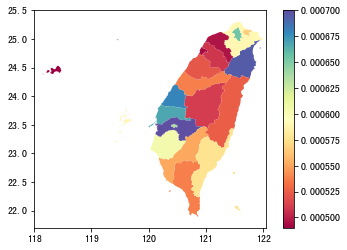

In [16]:
color = mpl.colors.Normalize(vmin=0.00049, vmax=0.0007)
districts3.plot(column = '肺癌比率', cmap = 'Spectral', legend = True, norm=color)
plt.xlim(118,122.05)
plt.ylim(21.7,25.5)